<a href="https://colab.research.google.com/github/dbetanc1/MAT421/blob/main/Module_A_Section_9_1%2C_9_2%2C_9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 9. Representation of Numbers**

---


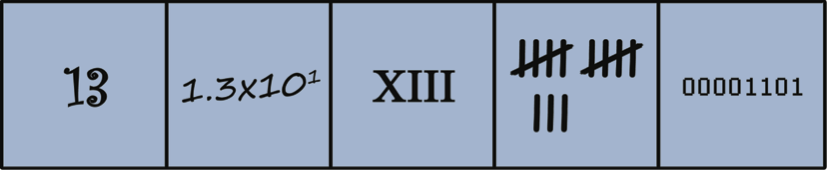

https://pythonnumericalmethods.berkeley.edu/_images/09.00.1-Number-representations.png

# **Section 9.1 Base-N and Binary**

---



In the decimal system, a number is represented by a list of digits from 0 to 9, where each digit represents the coefficient for a power of 10.

In [ ]:
#Example 1 decimal expansion
ex1 = 1*10**2 + 4*10**1 + 7*10**0 + 3*10**-1

print(ex1)

147.3


In [4]:
#Example 2 binary number 10001 into 17(base10).
ex2 = 1*2**4 + 0*2**3 + 0*2**2 + 0*2**1 + 1*2**0

print(ex2)

17


In [10]:
#Example 3 decimal number into binary
def decimalToBinary(n):
    return bin(n).replace("0b", "")
   
# Driver code
if __name__ == '__main__':
    print(decimalToBinary(37))
    print(decimalToBinary(17))

100101
10001


In [12]:
#Example 4 Addition

ex4 = 37 + 17
print(ex4)


54


In [13]:
# Example 5 Multiplication

ex5 = 37 * 17
print(ex5)

629


In [16]:
#Example 6 addition in binary
ex6 = (1*2**5 + 0*2**4 + 0*2**3 + 1*2**2 + 0*2**1 + 1*2**0) + (1*2**4 + 0*2**3 + 0*2**2 + 0*2**1 + 1*2**0)

#result in decimal
print(ex6)

#result in binary
print(decimalToBinary(ex6))

54
110110


In [23]:
#Example 7 multiplication in binary
ex7 = (1*2**5 + 0*2**4 + 0*2**3 + 1*2**2 + 0*2**1 + 1*2**0) * (1*2**4 + 0*2**3 + 0*2**2 + 0*2**1 + 1*2**0)

#result in decimal
print(ex7)

#result in binary
print(decimalToBinary(ex7))

629
1001110101


#**Section 9.2 Floating Point Numbers**
---


 To achieve the range of values needed with the same number of bits, we use floating point numbers or float for short. Instead of utilizing each bit as the coefficient of a power of 2, floats allocate bits to three different parts: the sign indicator, s, which says whether a number is positive or negative; characteristic or exponent, e, which is the power of 2; and the fraction, f, which is the coefficient of the exponent. Almost all platforms map Python floats to the IEEE754 double precision - 64 total bits.

In [26]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

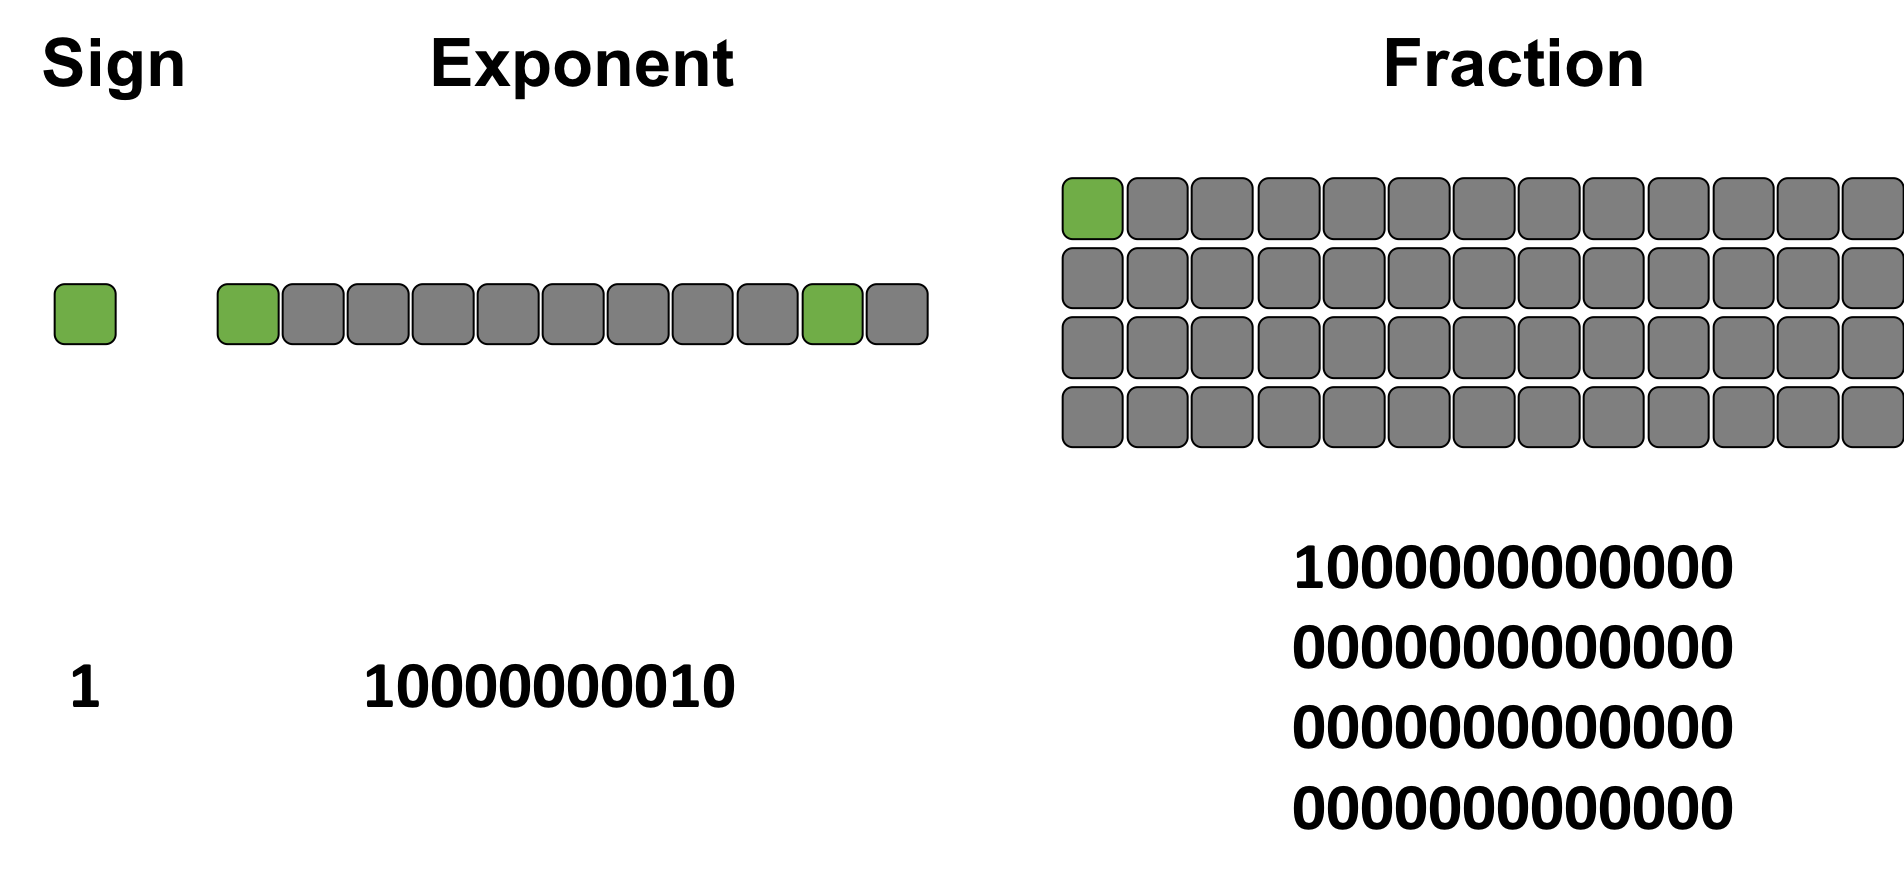

https://pythonnumericalmethods.berkeley.edu/_images/09.02.01-Binary_neg_12.png

In [28]:
# TRY IT! Use the spacing function to determine the gap at 1e9. Verify that adding a number to 1e9 that is less than half the gap at 1e9 results in the same number.

import numpy as np

print(np.spacing(1e9))

print(1e9 == (1e9 + np.spacing(1e9)/3))

1.1920928955078125e-07
True


In [33]:
# TRY IT! Compute the base10 value for 0 11111111110 1111111111111111111111111111111111111111111111111111 (IEEE754), the largest defined number for 64 bits, 
# and for 0 00000000001 000000000000000000000000000000000000000000000000000 (IEEE754), the smallest. Note that the exponent is, respectively, e = 2046 and 
# e = 1 to comply with the previously stated rules. Verify that Python agrees with these calculations using sys.float_info.max and sys.float_info.min.


largest = (2**(2046-1023))*((1 + sum(0.5**np.arange(1, 53))))
largest

print(sys.float_info.max)

smallest = (2**(1-1023))*(1+0)
smallest

print(sys.float_info.min)

1.7976931348623157e+308
2.2250738585072014e-308


In [34]:
# TRY IT! Show that adding the maximum 64 bits float number with 2 results in the same number. The Python float does not have sufficient precision to store the + 2 
# for sys.float_info.max, therefore, the operations is essentially equivalent to add zero. Also show that adding the maximum 64 bits float number with itself results 
# in overflow and that Python assigns this overflow number to inf.

print(sys.float_info.max + 2 == sys.float_info.max)

print(sys.float_info.max + sys.float_info.max)


True
inf


In [36]:
# TRY IT! The smallest subnormal number in 64-bit number has s = 0, e = 00000000000, and f = 0000000000000000000000000000000000000000000000000001. Using the special rules
# for subnormal numbers, this results in the subnormal number (−1)021−10232−52=2−1074. Show that 2−1075 underflows to 0.0 and that the result cannot be distinguished from 0.0. Show that 2−1074 does not.

print(2**(-1075))
print(2**(-1075) == 0)
print(2**(-1074))


0.0
True
5e-324


# **Section 9.3 Round-off Errors** 

---



The difference between an approximation of a number used in computation and its correct (true) value is called round-off error. The most common form round-off error is the representation error in the floating point numbers.

In [ ]:
# Round-off error by floating-point arithmetic
4.9 - 4.845 == 0.055

False

In [ ]:
# This is because the floating point can not be represented by the exact number, it is just approximation, and when it is used in arithmetic, it is causing a small error.
4.9 - 4.845

0.055000000000000604

In [37]:
#Another ex showing a small error
4.8 - 4.845

-0.04499999999999993

In [38]:
0.1 + 0.2 + 0.3 == 0.6

False

In [39]:
round(0.1 + 0.2 + 0.3, 5)  == round(0.6, 5)

True

In [40]:
# If we only do once
print(1 + 1/3 - 1/3)

#iterate adding and subtrating
def add_and_subtract(iterations):
    result = 1
    
    for i in range(iterations):
        result += 1/3

    for i in range(iterations):
        result -= 1/3
    return result

# If we do this 1000 times
print(add_and_subtract(1000))

# If we do this 10000 times
print(add_and_subtract(10000))

1.0
1.0000000000000064
1.0000000000001166
